In [ ]:
pip install ucimlrepo

import the required packages 


In [10]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

loading of the dataset

In [17]:

# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 
  
# metadata 
print(breast_cancer.metadata) 
  
# variable information 
print(breast_cancer.variables) 

# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Print the number of columns/features
print(f"Number of features: {df.shape[1] - 1}")

# Print the number of instances/rows
print(f"Number of instances: {df.shape[0]}")


{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'This breast cancer domain was obtained from the University Medical Centre, Institute of Oncology, Ljubljana, Yugoslavia. This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'Thi

In [23]:
print(df.head(10).to_string(index=False))

  age menopause tumor-size inv-nodes node-caps  deg-malig breast breast-quad irradiat                Class
30-39   premeno      30-34       0-2        no          3   left    left_low       no no-recurrence-events
40-49   premeno      20-24       0-2        no          2  right    right_up       no no-recurrence-events
40-49   premeno      20-24       0-2        no          2   left    left_low       no no-recurrence-events
60-69      ge40      15-19       0-2        no          2  right     left_up       no no-recurrence-events
40-49   premeno        0-4       0-2        no          2  right   right_low       no no-recurrence-events
60-69      ge40      15-19       0-2        no          2   left    left_low       no no-recurrence-events
50-59   premeno      25-29       0-2        no          2   left    left_low       no no-recurrence-events
60-69      ge40      20-24       0-2        no          1   left    left_low       no no-recurrence-events
40-49   premeno      50-54       0-2 

Perform an exploratory data analysis 

          age menopause tumor-size inv-nodes node-caps   deg-malig breast  \
count     286       286        286       286       278  286.000000    286   
unique      6         3         11         7         2         NaN      2   
top     50-59   premeno      30-34       0-2        no         NaN   left   
freq       96       150         60       213       222         NaN    152   
mean      NaN       NaN        NaN       NaN       NaN    2.048951    NaN   
std       NaN       NaN        NaN       NaN       NaN    0.738217    NaN   
min       NaN       NaN        NaN       NaN       NaN    1.000000    NaN   
25%       NaN       NaN        NaN       NaN       NaN    2.000000    NaN   
50%       NaN       NaN        NaN       NaN       NaN    2.000000    NaN   
75%       NaN       NaN        NaN       NaN       NaN    3.000000    NaN   
max       NaN       NaN        NaN       NaN       NaN    3.000000    NaN   

       breast-quad irradiat                 Class  
count          285     

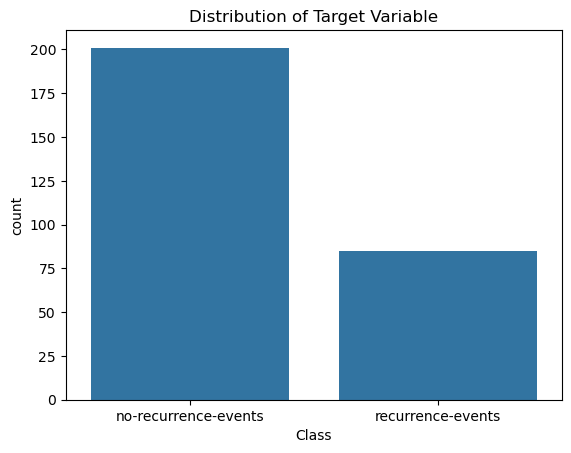

In [20]:
# Display summary statistics
print(df.describe(include='all'))

# Check for missing values
print(df.isnull().sum())

print('Target variable')
# Visualize the distribution of the target variable
sns.countplot(x='Class', data=df)
plt.title('Distribution of Target Variable')
plt.show()


Age

age
20-29     1
30-39    36
40-49    90
50-59    96
60-69    57
70-79     6
Name: count, dtype: int64
Class  no-recurrence-events  recurrence-events
Age                                           
0                         0                  0
1                         1                  0
2                        21                 15
3                        63                 27
4                        71                 25
5                        40                 17
6                         5                  1
7                         0                  0
8                         0                  0


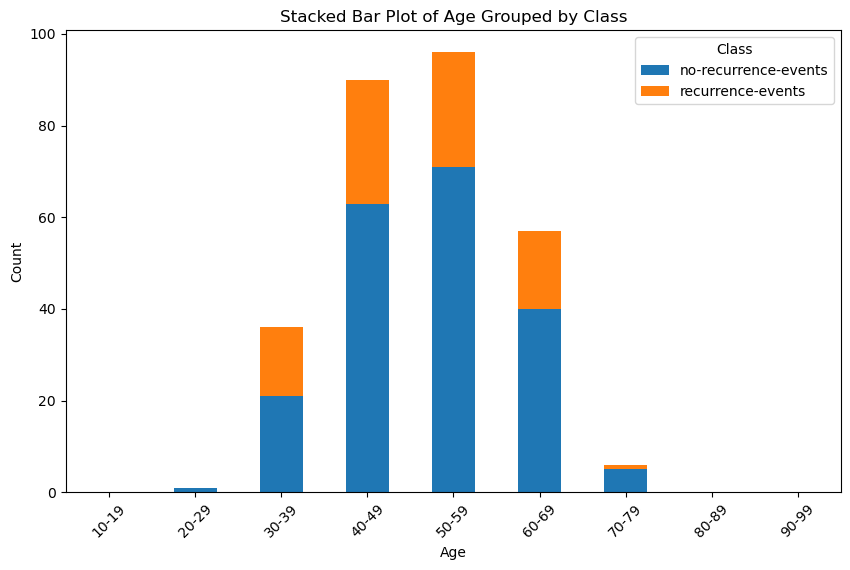

In [103]:
import numpy as np
from scipy.stats import norm

# feature: age 
# Define a mapping for the age ranges

# Count the number of rows for each age range
age_counts = df['age'].value_counts().sort_index()
print(age_counts)

age_mapping = {
    '10-19': 0, '20-29': 1, '30-39': 2, '40-49': 3,
    '50-59': 4, '60-69': 5, '70-79': 6, '80-89': 7, '90-99': 8
}

# Copy the original dataframe
df_processed = df.copy()

# Map the age ranges to numbers and create a new 'Age' feature
df_processed['Age'] = df_processed['age'].map(age_mapping)

# Remove the old 'age' feature
df_processed.drop(columns=['age'], inplace=True)

# Display the first few rows of the new dataframe
# print(df_processed.head())

# # Plot the histogram of the new 'Age' feature grouped by the 'Class' variable
# plt.figure(figsize=(10, 6))
# df_processed.groupby('Class')['Age'].plot(kind='hist', align='left', bins=range(len(age_mapping) + 1), rwidth=0.8, alpha=0.5)
# # df_processed.groupby('Class')['Age'].plot(kind='bar', alpha=0.5, stacked=True)

# # Add a legend to the histogram
# plt.legend(['No Recurrence', 'Recurrence'], title='Class')

# plt.title('Distribution of Age Feature Grouped by Class')
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.xticks(ticks=range(len(age_mapping)), labels=age_mapping.keys())
# plt.show()

# Create a crosstab of Age and Class, including 0 values for all Age ranges
age_class_crosstab = pd.crosstab(df_processed['Age'], df_processed['Class'], dropna=False)

# Ensure all age ranges are included in the crosstab
for age in age_mapping.values():
    if age not in age_class_crosstab.index:
        age_class_crosstab.loc[age] = [0, 0]

# Sort the crosstab by Age
age_class_crosstab = age_class_crosstab.sort_index()

print(age_class_crosstab)

# Plot the stacked bar chart
age_class_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Stacked Bar Plot of Age Grouped by Class')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(ticks=range(len(age_mapping)), labels=age_mapping.keys(), rotation=45)
plt.legend(title='Class')
plt.show()


Menopause

Class      no-recurrence-events  recurrence-events
Menopause                                         
0                             5                  2
1                            94                 35
2                           102                 48


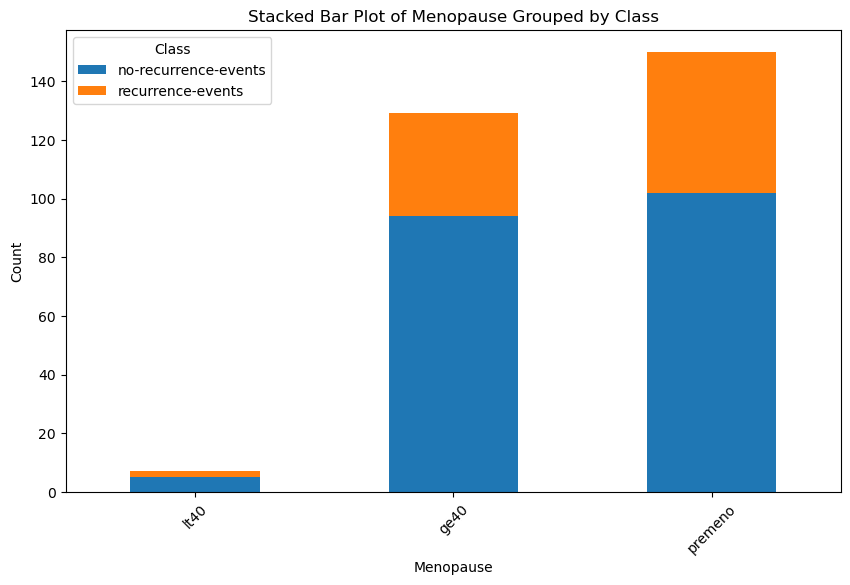

In [104]:
# Define a mapping for the menopause values
menopause_mapping = {
    'lt40': 0, 'ge40': 1, 'premeno': 2
}

# Copy the original dataframe
df_processed = df.copy()

# Map the menopause values to numbers and create a new 'Menopause' feature
df_processed['Menopause'] = df_processed['menopause'].map(menopause_mapping)

# Remove the old 'menopause' feature
df_processed.drop(columns=['menopause'], inplace=True)

# Create a crosstab of Menopause and Class, including 0 values for all Menopause categories
menopause_class_crosstab = pd.crosstab(df_processed['Menopause'], df_processed['Class'], dropna=False)

# Ensure all menopause categories are included in the crosstab
for menopause in menopause_mapping.values():
    if menopause not in menopause_class_crosstab.index:
        menopause_class_crosstab.loc[menopause] = [0, 0]

# Sort the crosstab by Menopause
menopause_class_crosstab = menopause_class_crosstab.sort_index()

print(menopause_class_crosstab)

# Plot the stacked bar chart
menopause_class_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add titles and labels
plt.title('Stacked Bar Plot of Menopause Grouped by Class')
plt.xlabel('Menopause')
plt.ylabel('Count')
plt.xticks(ticks=range(len(menopause_mapping)), labels=menopause_mapping.keys(), rotation=45)
plt.legend(title='Class')
plt.show()

Numerical variables

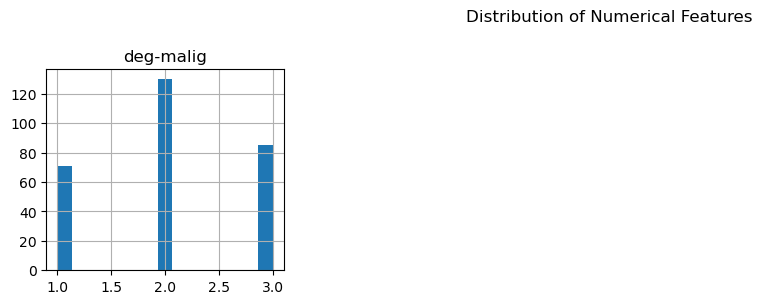

In [21]:
# Visualize the distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 4))
plt.suptitle('Distribution of Numerical Features')
plt.show()

Categorical variables 

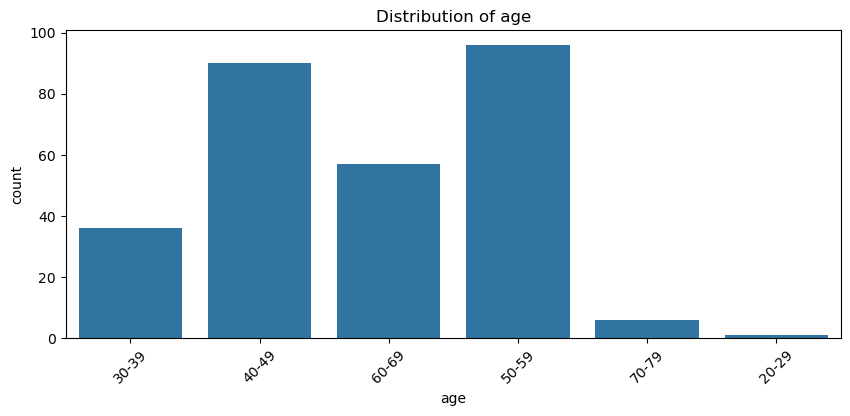

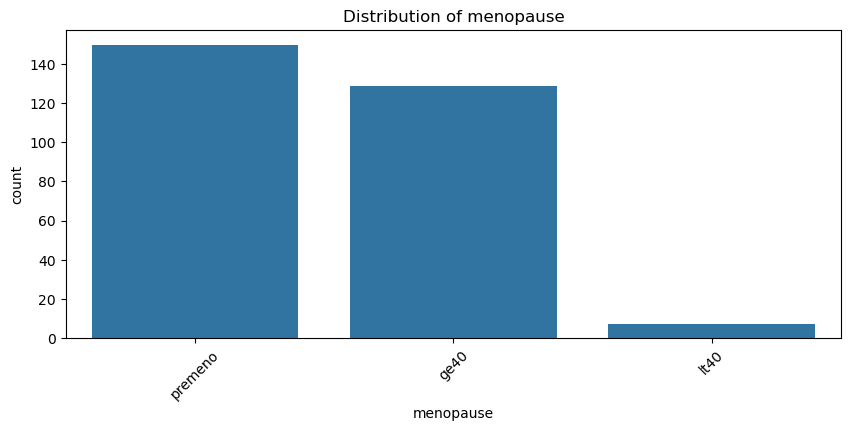

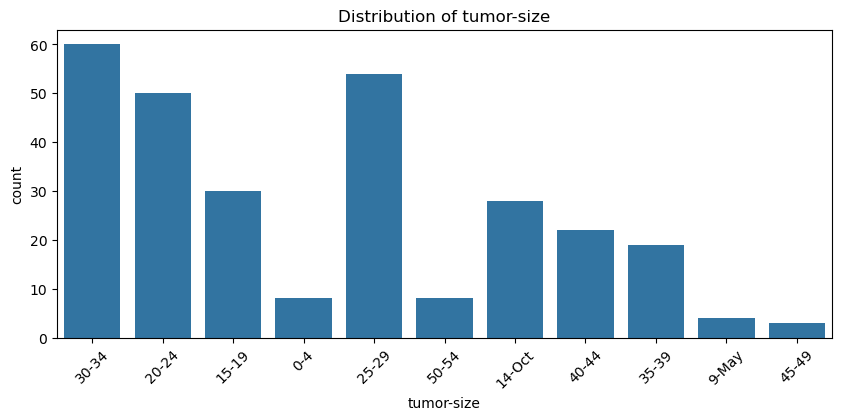

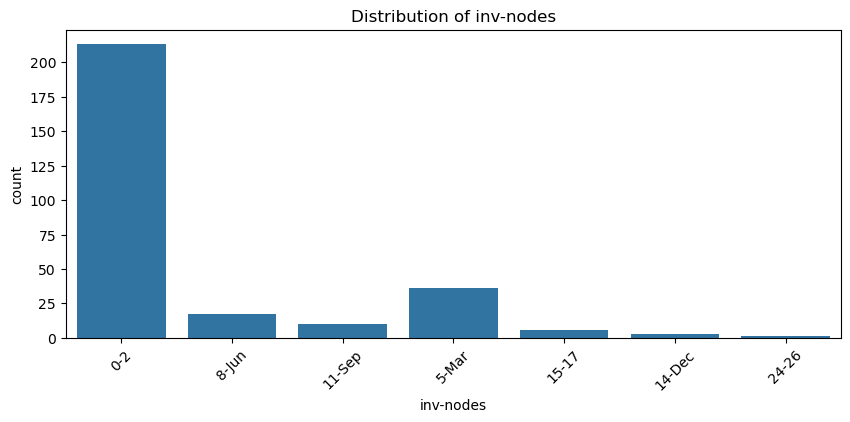

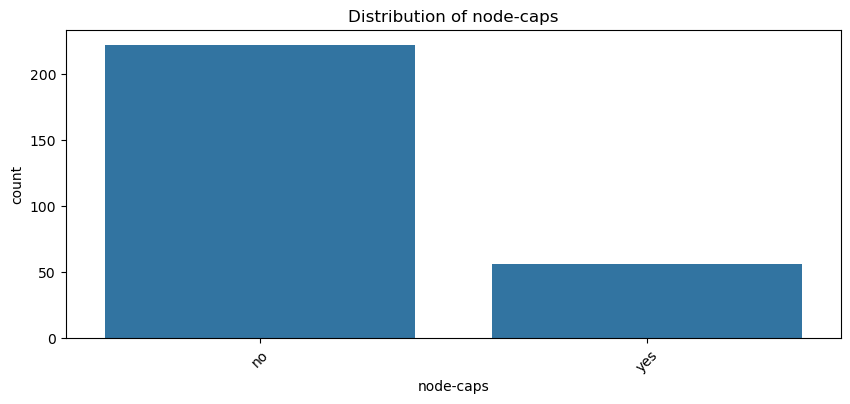

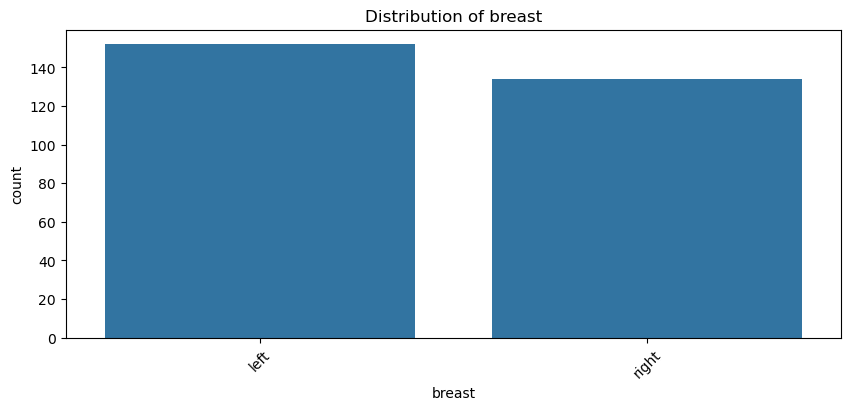

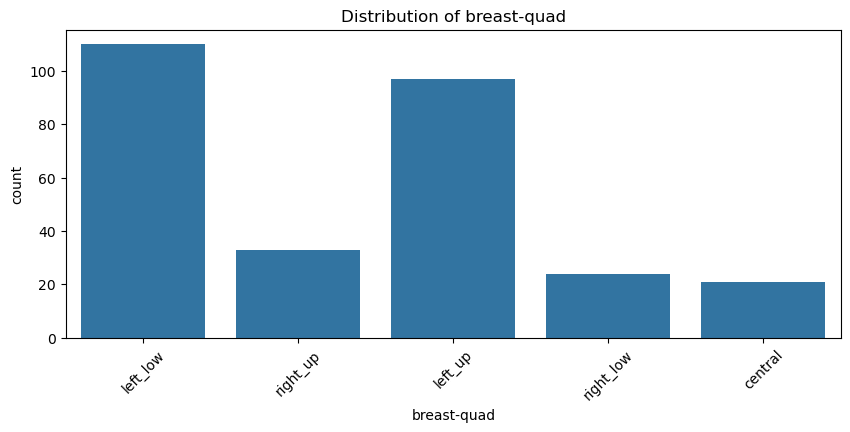

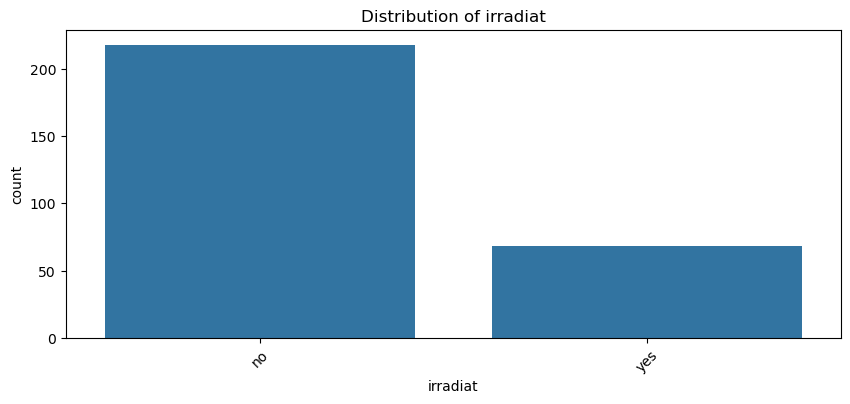

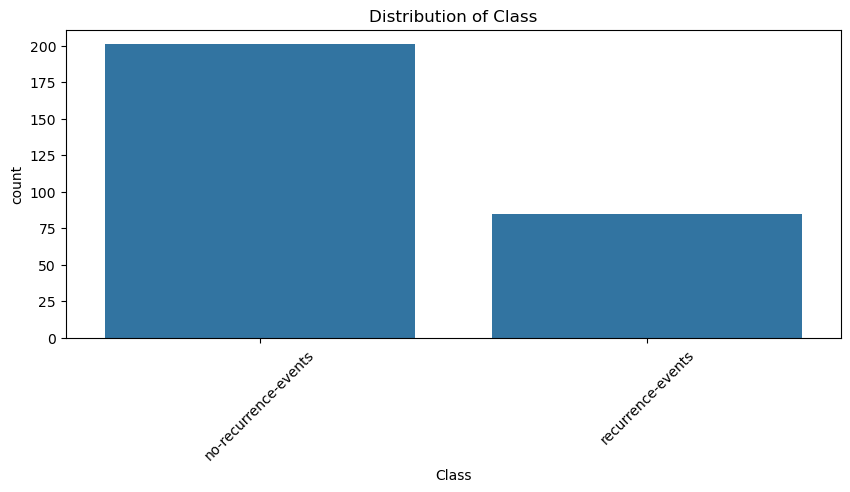

In [22]:

# Visualize the distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

In [15]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: '30-39'

<Figure size 1200x800 with 0 Axes>